In [1]:
'''
    This script is developed to make the plots for the B - \rho paper
    Date: 12 Nov 2021
    Author : sayantan auddy

    This script read the bayessian posterior from the saves .npy files and does the following
    1. Make the corner plot
    2. Make a fit plot
    3. Study the variation of the transitional density with the Alfvenic Mach nunber



'''

import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from numba import vectorize
import glob
plt.style.use('classic')
plt.rc('text',usetex=True)
import pandas as pd 

import read_data as rd

In [2]:
save_path_plots = './plots/'

path = './data_Updated/'
fit_model = 'dat'

list_of_files_B = glob.glob(path+"BB"+'*'+fit_model)
list_of_files_rho = glob.glob(path+"rho"+'*'+fit_model)


list_B = np.sort(list_of_files_B)
list_rho=  np.sort(list_of_files_rho)
print(list_B)
# print(list_rho)

['./data_Updated/BB_B10_V40.dat' './data_Updated/BB_B16_V20.dat'
 './data_Updated/BB_B16_V30.dat' './data_Updated/BB_B25_V20.dat'
 './data_Updated/BB_B25_V30.dat']


In [3]:
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

1040
./data_Updated/BB_B10_V40.dat ./data_Updated/rho_B10_V40.dat


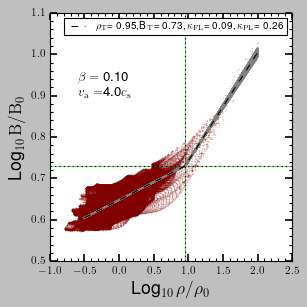

1620
./data_Updated/BB_B16_V20.dat ./data_Updated/rho_B16_v20.dat


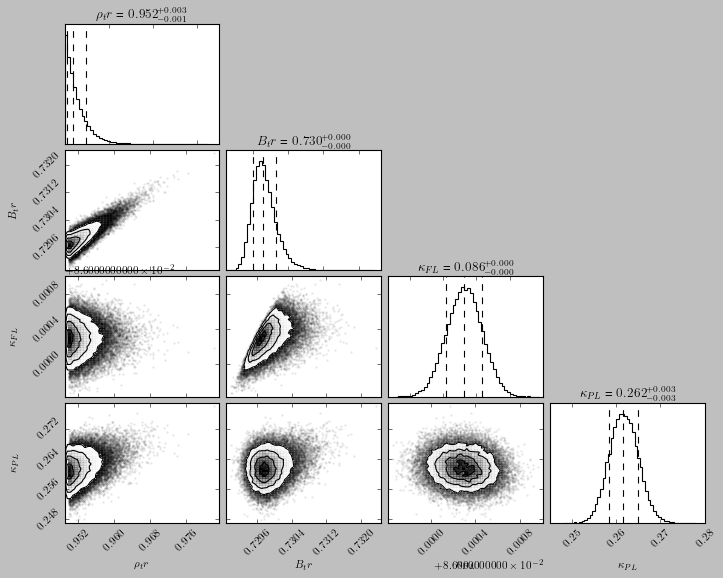

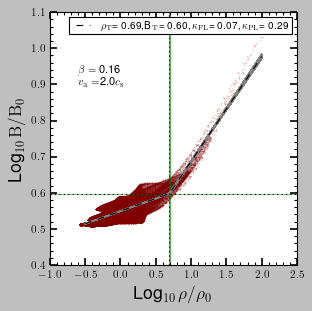

1630
./data_Updated/BB_B16_V30.dat ./data_Updated/rho_B16_v30.dat


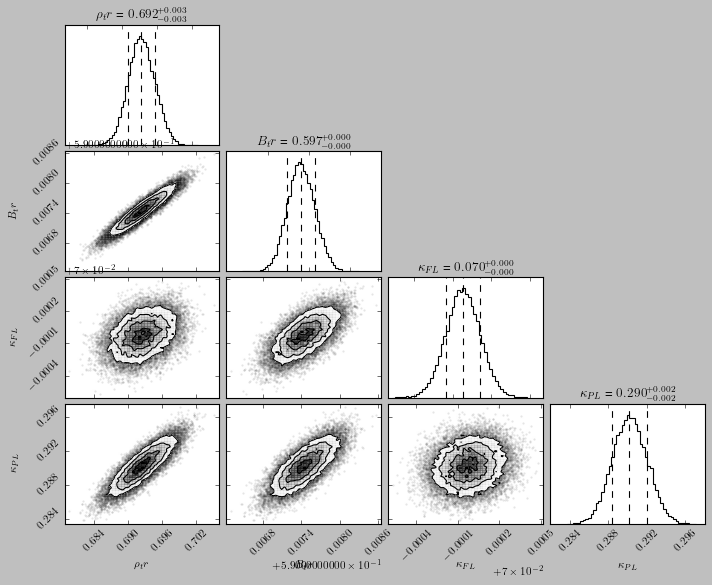

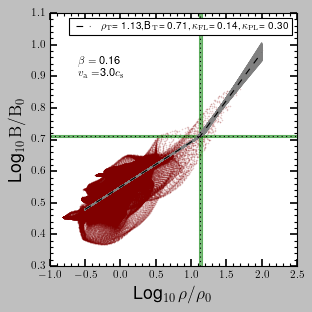

2520
./data_Updated/BB_B25_V20.dat ./data_Updated/rho_B25_v20.dat


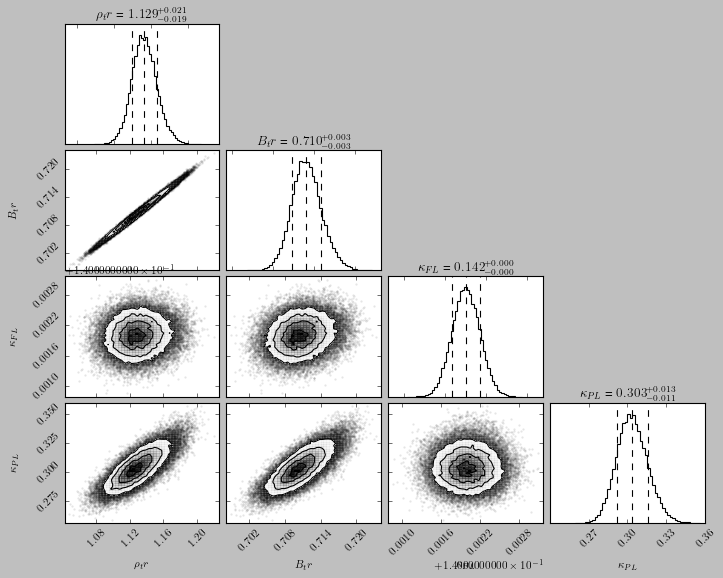

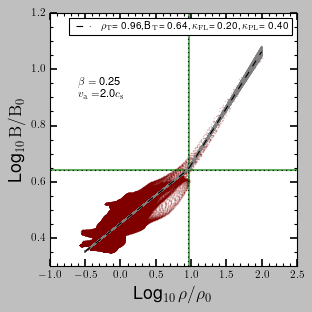

2530
./data_Updated/BB_B25_V30.dat ./data_Updated/rho_B25_v30.dat


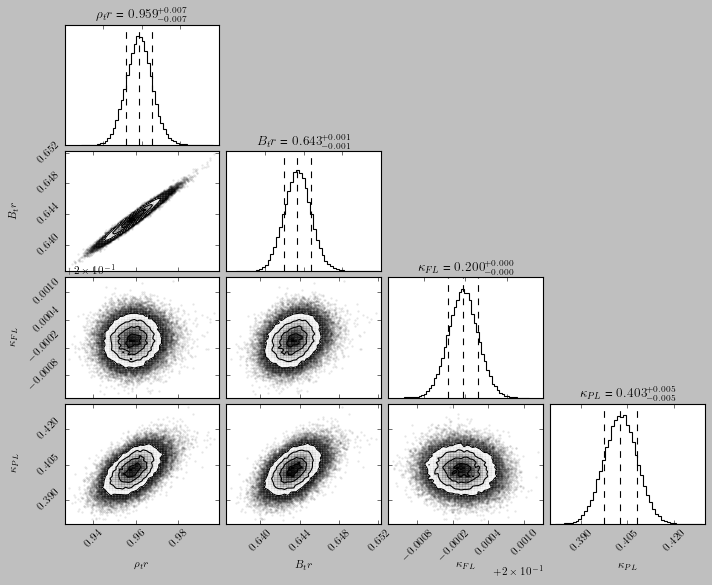

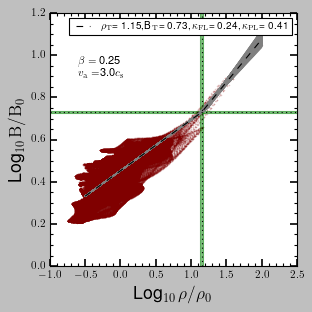

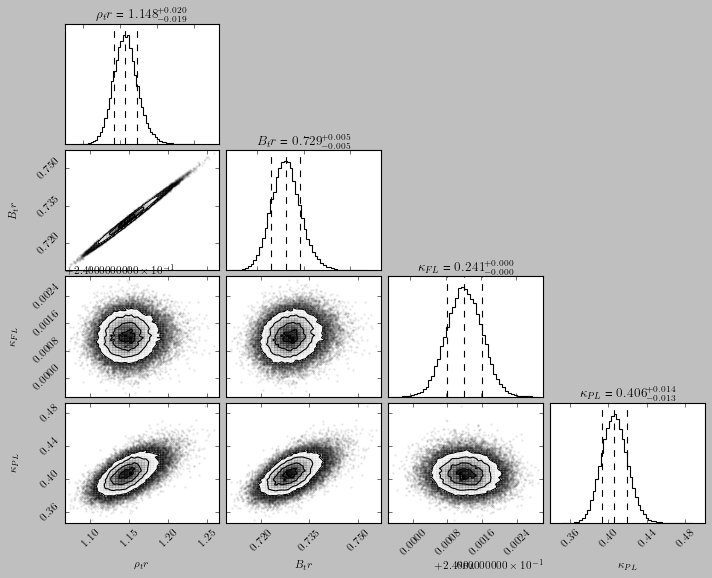

In [4]:
for i in range(len(list_B)):
#     i =0
    filename = list_B[i].split('/')[2]
    print(filename[4:6]+filename[8:10])
    ## Reading the raw data 
    Magnetic_field,density,Column_density,bin_means,bincenter = rd.magetic_field_VS_density(list_B[i],list_rho[i],option="Density",cutoff=0)
    sim_name = filename[4:6]+filename[8:10]
    x = density
    y = Magnetic_field
    
    ## Reading the bayesian parameters
    samples = np.load('sample_'+str(sim_name)+'.npy')
    
    ## Fit parameters
    params = pd.DataFrame(samples, columns = ['$\rho_{tr}$','$B_{tr}$','$\kappa_{FL}$','$\kappa_{PL}$','std'])
#     params.describe()
    stat = params.describe().T
    parameters_mean = stat['mean'][0],stat['mean'][1],stat['mean'][2],stat['mean'][3]
    
    plt.figure(figsize = (4,4))
    
    ## Randomly selecting from parameters
    inds = np.random.randint(len(samples), size=10000)
    x_plot = np.linspace(-0.5, 2, 200)
    for ind in inds:
        sample = samples[ind]
        plt.plot(x_plot, piecewise_linear(x_plot,*sample[:4]),"grey")
    x_plot = np.linspace(-0.5, 2, 200)
    plt.plot(x_plot, piecewise_linear(x_plot,*parameters_mean),"k",ls='--',label = r'$\rho_{\rm T}$=%5.2f,B $_{\rm T}$=%5.2f,'% tuple(parameters_mean[:2])+ r' $\kappa_{\rm FL}$=%5.2f, $\kappa_{\rm PL}$=%5.2f' % tuple(parameters_mean[2:]))
    plt.text(-.6,0.9,r' $\beta=$ '+str('0.'+filename[4:6])+'\n'+r'$v_{\rm a} = $'+str(filename[8]+'.'+filename[9])+r'$c_{\rm s}$')
    plt.scatter(x, y,color='maroon',s=0.01)
    plt.axvspan(stat['mean'][0]+stat['std'][0],stat['mean'][0]+-stat['std'][0], alpha=0.5, color='green')
    plt.axvline(stat['mean'][0],linewidth=1,color='k',ls=':')
    plt.axhspan(stat['mean'][1]+stat['std'][1],stat['mean'][1]+-stat['std'][1], alpha=0.5, color='green')
    plt.axhline(stat['mean'][1],linewidth=1,color='k',ls=':')
#     plt.annotate(r' $\beta=$ '+str('0.'+filename[4:6])+r',$v_{\rm a} = $'+str(filename[8]+'.'+filename[9])+r'$c_{\rm s}$',(10.0,-1), fontsize=12)
    plt.ylabel(r"Log$_{10}\, \rm B/B_{0} $",fontsize=16)
    plt.xlabel(r"Log$_{10} \,\rho/\rho_{0}$",fontsize=16)
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5)
    plt.tick_params(which='minor', length=3, width=1, direction='in')
    plt.legend(loc=1, fontsize=9,frameon=True)
    plt.tight_layout()
    plt.savefig(save_path_plots +str(filename[4:6]+filename[8]+filename[9])+"fit.jpg",format='jpg',dpi=300)
    plt.show()
    
    
    
#     label=r'$\rho_{\rm T}$=%5.2f,B$_{\rm T}$=%5.2f,'% tuple(parameters_mean[:2])+'\n'+ r'$\kappa_{\rm FL}$=%5.2f, $\kappa_{\rm PL}$=%5.2f' % tuple(parameters_mean[2:]
    import corner

    labels = [r"$\rho_tr$", r"$B_tr$", r"$\kappa_{FL}$", r"$\kappa_{PL}$"]

    plt.rc("font",size=10)

    fig = plt.figure(2,figsize=(10,8))
    fig.clf()
    corner.corner(samples[:,:4],fig=fig,labels=labels,bins=50,
                    quantiles=[0.16,0.5,0.84],show_titles=True,
                    title_fmt=".3f",TickLabelFormat = '%.2f')
    fig.subplots_adjust(left=0.16,right=0.96,bottom=0.16,top=0.94)
    plt.savefig(save_path_plots +"Corner"+str(filename[4:6]+filename[8]+filename[9])+"fit.jpg",format='jpg',dpi=300)
    
    
    
    

In [5]:
np.shape(samples)

(55160, 5)

In [6]:
# mcmc_params= samples[:,:4]
# rho_t =samples[:,0] 
# B_t =  samples[:,1]
# k_FL=  samples[:,2]
# k_PL=  samples[:,3]

## Finding the statistic of each of the parameters: 
# rho_t.mean()

# mean = [] 
# std = []
# quartile_1 = [] 
# quartile_3 = []
# # for i in range(0,4):
# #     mean.append(samples_mean[:,i].mean())
# #     std.append(samples_mean[:,i].std())
# q75, q25 = np.percentile(samples_for_stat[:,1], [75,25])
# print(q75,q25)

In [7]:
params = pd.DataFrame(samples, columns = ['$\rho_{tr}$','$B_{tr}$','$\kappa_{FL}$','$\kappa_{PL}$','std'])
stat = params.describe().T

In [8]:
# stat['std'][0]
# stat['std']

In [9]:
### This is reading the fit parameters from the b-rho plots obtained from the
### the simulation 

# Initializing empty lists to store the parameters
rho_tp = []
rho_tp_std = []
beta = []
va = []


for i in range(len(list_B)):
    filename = list_B[i].split('/')[2]
    va.append(float(filename[8]+'.'+ filename[9]))
    beta.append(float('.'+filename[4:6]))
    sim_name = filename[4:6]+filename[8:10]
    samples = np.load('sample_'+str(sim_name)+'.npy')
    params = pd.DataFrame(samples, columns = ['$\rho_{tr}$','$B_{tr}$','$\kappa_{FL}$','$\kappa_{PL}$','std'])
    stat = params.describe().T
    
    stat
    rho_tp.append(10**stat['mean'][0])
    rho_tp_std.append(10**stat['std'][0])

va = np.asarray(va)
beta = np.asarray(beta)

In [10]:
from scipy.optimize import curve_fit
def fit_function(xdata,a):
    return a*(xdata+1)

[3.2  1.28 2.88 2.   4.5 ]


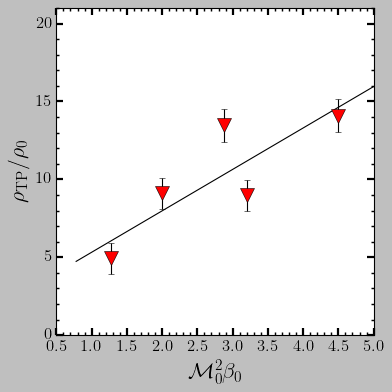

In [11]:
mach_square = 2 * (va)**2 
# beta = ([.16,.25,.16,0.25,0.36,0.36])
xaxis = (mach_square*beta)

popt, pcov = curve_fit(fit_function, xaxis, rho_tp,sigma=rho_tp_std)
print(xaxis)
plt.figure(figsize = (5,5))

plt.minorticks_on() 
plt.tick_params(labelsize=15)
plt.tick_params(axis='both', which='major',length=6, width=2)

plt.tick_params(axis='both', which='minor',length=3, width=1.3)

# plt.tick_params(axis='both',which='minor',length=5,width=2,labelsize=18)

plt.errorbar(xaxis, rho_tp, yerr=rho_tp_std,ecolor='k',c = 'r',fmt='v',markersize=12,capsize=3)
# plt.boxplot([T1,T2,T3,T4,T5,T6],positions=xaxis,showmeans=True,showfliers=False,widths=0.4,manage_xticks =False,showbox=True,
#            showcaps=False)

m2b =np.linspace(min(xaxis)-0.5,max(xaxis)+0.5,10)
# ytheory = 1.62*(2*m2b +1)
ytheory2 =popt*(m2b +1)
plt.ylim(0,21) 
plt.yticks(np.arange(0, 21, 5))
# plt.xlim(0,7) 
# plt.xticks(np.arange(0, 7, 2))
# plt.plot(m2b,ytheory,label= 'slope 2')
plt.plot(m2b,ytheory2,'k-',label= r'Model: $\Sigma_{\rm TP}/\Sigma_{0}$ =%5.1f '%popt + r'$\times$($\mathcal{M}^2_{\rm 0}\beta $+1)')
# plt.legend(loc = 2,fontsize =20)

plt.ylabel(r'$\rho_{\rm{TP}}/\rho_{0}$',fontsize =20)
plt.xlabel(r'$\mathcal{M}^2_{\rm 0}\beta_{0} $',fontsize =20)
# plt.text(.3,16,r'$\Sigma/\Sigma_{0}$ =%5.2f '%popt + r'$\times$(2$\mathcal{M}^2\beta $+1)',color='black', fontsize=19)

plt.tight_layout()
plt.savefig(save_path_plots +"rho_variation.jpeg")
plt.show()